In [34]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [35]:
from __future__ import print_function, division, absolute_import,unicode_literals

import tensorflow as tf
from tensorflow import keras

from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, MaxPooling2D
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


import matplotlib.pyplot as plt
import os
import sys


import numpy as np

print(tf.__version__)

2.1.0-dev20191203


In [36]:
train_dir = 'train'
validation_dir = 'validation'

In [89]:
train_cardboard_dir = os.path.join(train_dir, 'cardboard')  # directory with our training 
train_glass_dir = os.path.join(train_dir, 'glass')  # directory with our training 
train_metal_dir = os.path.join(train_dir, 'metal')
train_paper_dir = os.path.join(train_dir, 'paper')
train_plastic_dir = os.path.join(train_dir, 'plastic')

validation_cardboard_dir = os.path.join(validation_dir, 'cardboard')  # directory with our validation
validation_glass_dir = os.path.join(validation_dir, 'glass')  # directory with our validation
validation_metal_dir = os.path.join(validation_dir, 'metal')
validation_paper_dir = os.path.join(validation_dir, 'paper')
validation_plastic_dir = os.path.join(validation_dir, 'plastic')


In [90]:
num_cardboard_tr = len(os.listdir(train_cardboard_dir))
num_glass_tr = len(os.listdir(train_glass_dir))
num_metal_tr = len(os.listdir(train_metal_dir))
num_paper_tr = len(os.listdir(train_paper_dir))
num_plastic_tr = len(os.listdir(train_plastic_dir))

num_cardboard_val = len(os.listdir(validation_cardboard_dir))
num_glass_val = len(os.listdir(validation_glass_dir))
num_metal_val = len(os.listdir(validation_metal_dir))
num_paper_val = len(os.listdir(validation_paper_dir))
num_plastic_val = len(os.listdir(validation_plastic_dir))

total_train = num_cardboard_tr + num_glass_tr + num_metal_tr + num_paper_tr + num_plastic_tr
total_val = num_cardboard_val + num_glass_val + num_metal_val + num_paper_val + num_plastic_val

In [91]:
print('total training cardboard images:', num_cardboard_tr)
print('total training glass images:', num_glass_tr)
print('total training metal images:', num_metal_tr)
print('total training paper images:', num_paper_tr)
print('total training plastic images:', num_plastic_tr)

print('total validation cardoard images:', num_cardboard_val)
print('total validation glass images:', num_glass_val)
print('total validation metal images:', num_metal_val)
print('total validation paper images:', num_paper_val)
print('total validation plastic images:', num_plastic_val)

print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cardboard images: 404
total training glass images: 501
total training metal images: 410
total training paper images: 594
total training plastic images: 482
total validation cardoard images: 32
total validation glass images: 16
total validation metal images: 33
total validation paper images: 77
total validation plastic images: 89
--
Total training images: 2391
Total validation images: 247


In [45]:
epochs = 16
batch_size = 200
IMG_HEIGHT = 100
IMG_WIDTH = 150

In [46]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [47]:
classification = ['cardboard','glass','metal','paper','plastic']

In [102]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           classes = classification, 
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')

Found 2390 images belonging to 5 classes.


In [103]:
train_data_gen.classes

array([0, 0, 0, ..., 4, 4, 4], dtype=int32)

In [104]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              classes = classification,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='categorical')

Found 246 images belonging to 5 classes.


In [105]:
sample_training_images, _ = next(train_data_gen)

In [52]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

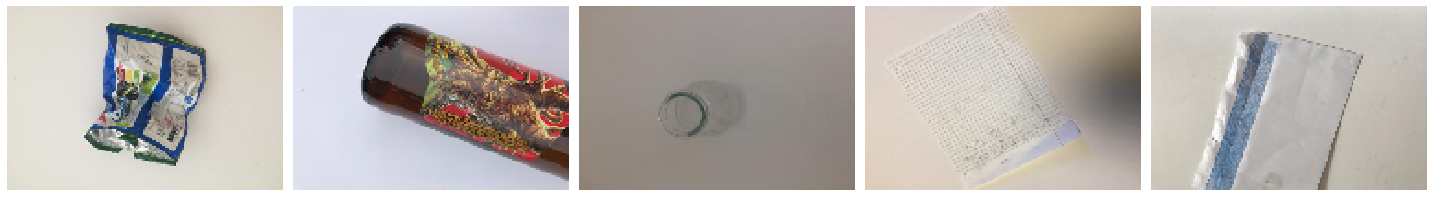

In [106]:
plotImages(sample_training_images[:5])

In [108]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(5, activation='sigmoid')
])

In [109]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [110]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 100, 150, 16)      448       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 50, 75, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 50, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 25, 37, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 25, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 12, 18, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 13824)            

In [111]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/16
11/11 [==============================] - 40s 4s/step - loss: 0.5235 - accuracy: 0.7534 - val_loss: 0.4654 - val_accuracy: 0.8000
Epoch 2/16
11/11 [==============================] - 38s 3s/step - loss: 0.4367 - accuracy: 0.8155 - val_loss: 0.4289 - val_accuracy: 0.8261
Epoch 3/16
11/11 [==============================] - 40s 4s/step - loss: 0.4092 - accuracy: 0.8310 - val_loss: 0.3834 - val_accuracy: 0.8450
Epoch 4/16
11/11 [==============================] - 41s 4s/step - loss: 0.3700 - accuracy: 0.8389 - val_loss: 0.3219 - val_accuracy: 0.8652
Epoch 5/16
11/11 [==============================] - 42s 4s/step - loss: 0.3514 - accuracy: 0.8500 - val_loss: 0.3335 - val_accuracy: 0.8650
Epoch 6/16
11/11 [==============================] - 41s 4s/step - loss: 0.3246 - accuracy: 0.8614 - val_loss: 0.2556 - val_accuracy: 0.8913
Epoch 7/16
11/11 [==============================] - 41s 4s/step - loss: 0.2983 - accuracy: 0.8734 - val_loss: 0.2883 - val_accuracy: 0.8830
Epoch 8/16
11/11 [==

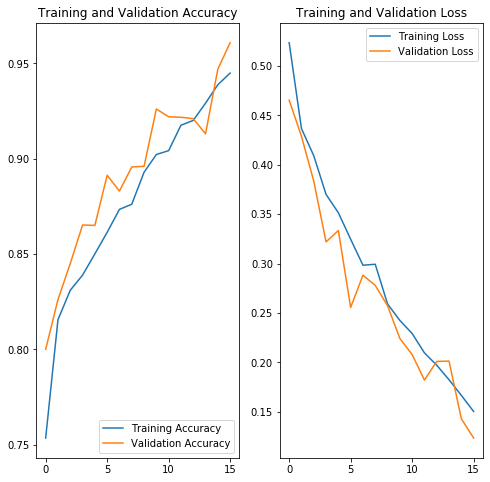

In [112]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [130]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.applications.imagenet_utils import preprocess_input
import cv2

In [136]:
img_path = '403.jpg'

In [137]:
#def prepare_image(img_path, model):
    # 加载图像
img = load_img(img_path, target_size=(100, 150))        # x = np.array(img, dtype='float32')test
    # 图像预处理
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
results = model.predict(x)
print(results)
    #return results

[[0. 0. 1. 0. 0.]]


In [138]:
classes_types = ['cardboard', 'glass', 'metal', 'paper', 'plastic']

In [142]:
#def generate_result(result):
   # for i in range(5):
   #     if(results[0][i] == 1):
           # print(i)
           # print(classes_types[i])
   

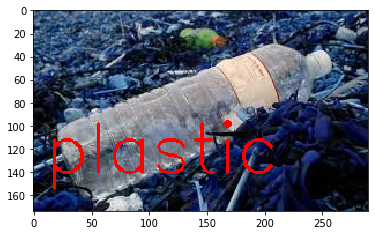

In [143]:
#showing the results
    font = cv2.FONT_HERSHEY_SIMPLEX   
    img= cv2.imread(img_path)
    plt.imshow(img)
    img3 = cv2.putText(img, classes_types[i], (10, 140), font, 2, (255, 0, 0), 2)
    plt.imshow(img3)
    plt.show()